<a href="https://colab.research.google.com/github/JuanDavid1703/Machine-Learning/blob/main/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Autor: Juan David Leal**

#Exercise 1.12

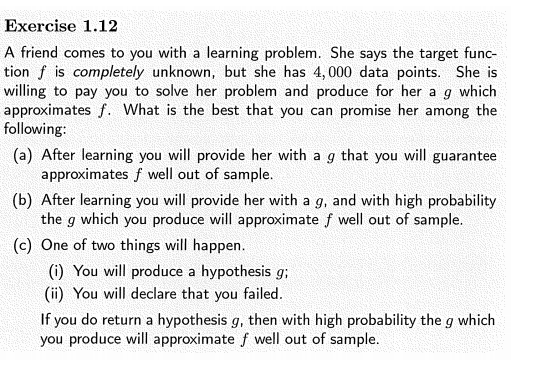

Lo más posible es la c) dado que se puede fallar pero en caso de que no se puede asegurar que será una buena aproximación a la resolución del problema

#Exercise 1.2

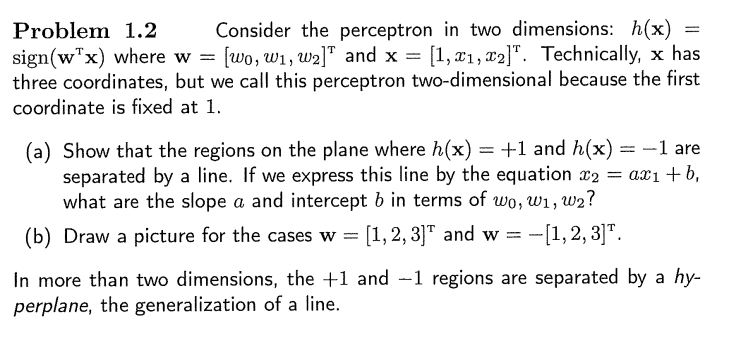

1. La ecuación de una plano se puede expesar como $f(x_1,x_2)=w^T x$, así se tendría que

$f(x_1,x_2)=w_0+w_1x_1+w_2x_2$

como se necesita ver  que puntos están por encima del plano y cuales están por debajo, se necesita ver cual es el corte del plano $f$ con el plano $x_1 x_2$, entonces, eso se da si $w^Tx=0$

$$w_0+w_1x_1+w_2x_2=0$$
$$x_2=-\frac{w_1}{w_2}x_1-\frac{w_0}{w_2}$$

así $a=-\frac{w_1}{w_2}$ y $b=-\frac{w_0}{w_2}$


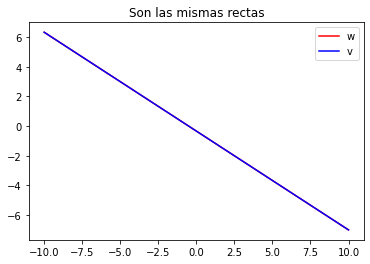

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

w=np.array([1,2,3])
v=-w

x=np.linspace(-10,10,50)
y1=-w[1]/w[2] *x-w[0]/w[2]
y2=-v[1]/v[2] *x-v[0]/v[2]

plt.plot(x,y1,"r-", label="w")
plt.plot(x,y2,"b-",label="v")
plt.title("Son las mismas rectas")
plt.legend()
plt.show()

#1.4

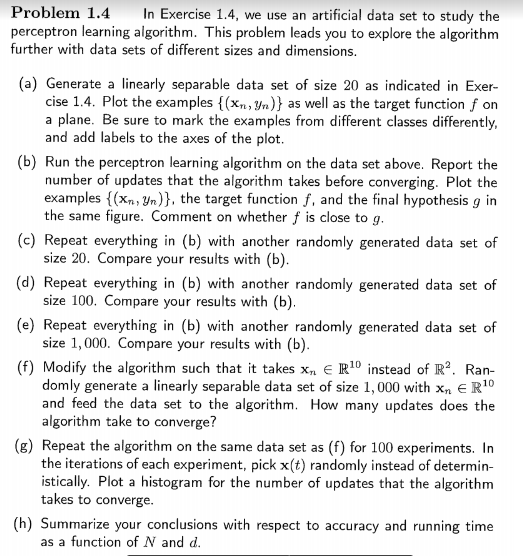

In [ ]:


def perceptron(dim, npoints):

  X=np.zeros(shape=(npoints,dim))
  Y=np.zeros(shape=(npoints,1))
  unos=np.ones(shape=(npoints,1))
  #Dimensión debe ser unn número mayor a 2
  for i in range(len(X)):
    X[i]=np.concatenate( (unos[i],np.random.uniform(-20,20,dim-1)))


  if dim==3:
    m=np.floor(np.random.uniform(-5,5)*100)/100
    b=np.floor(np.random.uniform(-10,10)*100)/100

    x=np.linspace(np.min(np.floor(X[:,1])),np.max(np.ceil(X[:,1])),npoints)
    y=m*x+b
    plt.figure(figsize=(8,6))
    for  i in range(npoints):
      if X[i,2]>=m*X[i,1]+b:
        Y[i]=1
        plt.scatter(X[i,1],X[i,2],marker=".", c="r")
      else:
        Y[i]=-1
        plt.scatter(X[i,1],X[i,2],marker=".", c="b")
    plt.plot(x,m*x+b,"k-",label=f"Recta con m={m} y b={b}")
    plt.legend()
    plt.show()

  if dim==4:
    a=np.floor(np.random.uniform(-5,5)*100)/100
    b=np.floor(np.random.uniform(-5,5)*100)/100
    c=np.floor(np.random.uniform(-5,5)*100)/100
    
    x=np.linspace(np.min(np.floor(X[:,1])),np.max(np.ceil(X[:,1])),npoints)
    y=np.linspace(np.min(np.floor(X[:,2])),np.max(np.ceil(X[:,2])),npoints)
    
    x1,x2=np.meshgrid(x,y)

    z=a*x1+b*x2+c
    fig = plt.figure()
    fig.set_size_inches((10,10))
    ax3d = plt.axes(projection='3d')
    for i in range(npoints):
      if X[i,3] >=a*X[i,1]+b*X[i,2]+c:
        Y[i]=1
        ax3d.scatter3D( X[i,1],X[i,2] ,X[i,3],c="r")
      else:
        Y[i]=-1
        ax3d.scatter3D( X[i,1],X[i,2] ,X[i,3],c="b")

    ax3d.plot_surface(x1, x2, z,cmap='gist_gray')
    ax3d.set_title(f"Plano z con a={a}, b={b}, c={c}")
    ax3d.set_xlabel('x1')
    ax3d.set_ylabel('x2')
    ax3d.set_zlabel('z')  
    plt.show()
  if dim>4:
    W0=np.floor(np.random.uniform(-5,5,dim-1)*100)/100
    for i in range(npoints):
      if X[i,dim-1] >=W0 @X[i,:dim-1]:
        Y[i]=1
      else:
        Y[i]=-1
  return X,Y,dim

Clasificación: Se puede escoger la dimensión de los puntos y la cantidad de pubntos que se quiere clasificar, claro está que a mayor cantidad de puntos mayor cantidad de pasos se necesitarán, sin embargo al aplicar el algoritmo se puede verificar que al aumenta la dimesionalidad se necesitna menos pasos para clasificar.

Por favor ingrese hasta que dimensión quiere verificar la clasificación: 100
Por favor ingrese la cantidad de puntos que quiere clasificar: 1000


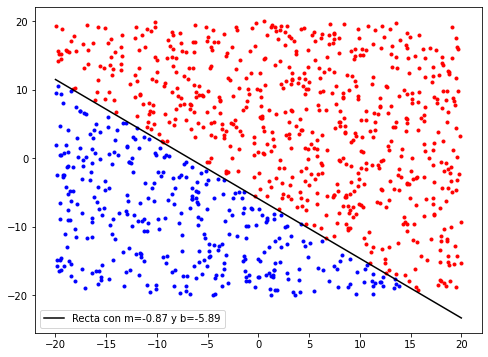

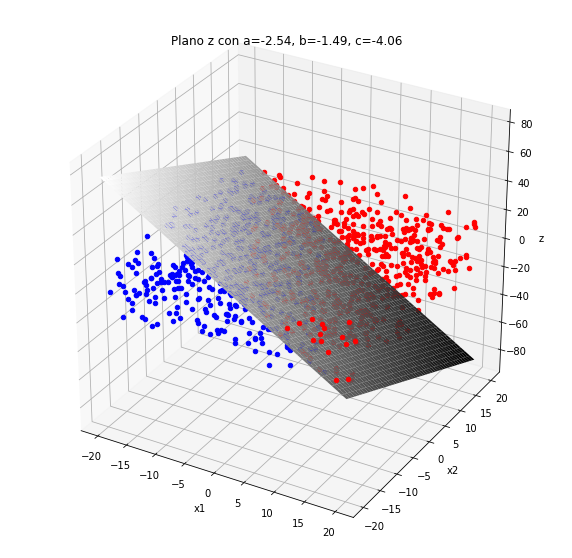

____________________________________________________________________________________________
La siguiente gráfica rpresenta la cantidad de pasos usada en cada dimensión


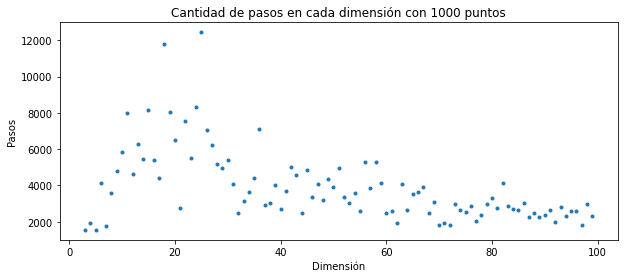

In [ ]:
dimensi_final=input("Por favor ingrese hasta que dimensión quiere verificar la clasificación: ")
Cant_puntos=input("Por favor ingrese la cantidad de puntos que quiere clasificar: ")
Pasos=[]
#La dimensión debe ser mayor a 2
for di in range(3,int(dimensi_final)):
  X,Y,dim=perceptron(di,npoints=int(Cant_puntos))
  W=np.random.uniform(-1,1,dim)
  pasos=0
  while True:
    pos=-1
    i=0
    error=0
    for i in range(len(X)):
      error=abs(np.sign(W@X[i])-Y[i])[0]
      if error>0:
        pos=i
        break
    if pos==-1:
      break
    else:
      W=W+X[i]*Y[i]
      pasos+=1 

  Pasos.append(pasos)

print("____________________________________________________________________________________________")
print("La siguiente gráfica representa la cantidad de pasos usada en cada dimensión")
plt.figure(figsize=(10,4))
plt.plot(np.arange(3,int(dimensi_final)),Pasos,".")
plt.xlabel("Dimensión")
plt.ylabel("Pasos")
plt.title(f"Cantidad de pasos en cada dimensión con {int(Cant_puntos)} puntos")
plt.show()

#1.6

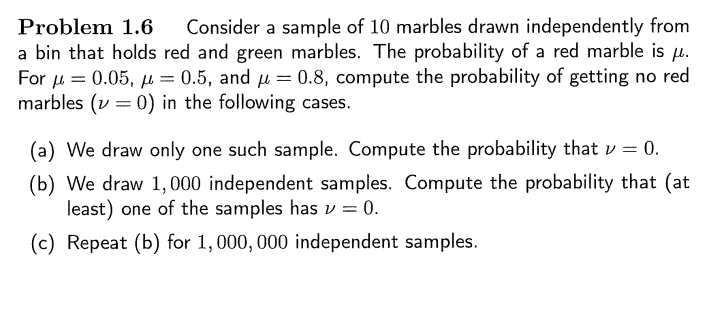

a. Como la probabilidad de obtener una bola roja es $\mu=0.05$, $\mu=0.5$, $\mu=0.8$, entonces se tiene que la probabilidad de obtener una bola verde es $1-\mu=0.95$, $1-\mu=0.5$, $1-\mu=0.2$.

Así para 10 pelotas escogidas al azar, la probabilidad de no tener una roja en eso 10 lanzamientos es lo mismo que obtener todas verdes:

Para $\mu=0.05$, 
 
$P_1(v=0)=(0.95)^{10}=0.095$

Para $\mu=0.5$, 

$P_2(v=0)=(0.5)^{10}=0.0097$ 

 Para $\mu=0.8$

$P_3(v=0)=(0.2)^{10}$

b. Se puede tomar como una binomial de parámetros $n=1000$ y $p=P_i$, así

* $B_1(1000,0.095)$

$$P(X\geq1)=1-P(X=0)$$
$$P(X\geq1)=1-\binom{1000}{0} 0.095^0(1-0.095)^{1000}$$
$$P(X\geq1)=1-4.45 \times 10^{-44}$$
$$P(X\geq1)\approx 1$$

* $B_2(1000, 0.0097)$

$$P(X\geq1)=1-P(X=0)$$
$$P(X\geq1)=1-\binom{1000}{0} 0.0097^0(1-0.0097)^{1000}$$
$$P(X\geq1)=1-5.84 \times 10^{-5}$$
$$P(X\geq1)=0.99$$

* $B_3(1000,0.2^{10})$

$$P(X\geq1)=1-P(X=0)$$
$$P(X\geq1)=1-\binom{1000}{0} (0.2)^0(1-(0.2)^10)^{1000}$$
$$P(X\geq1)=1-0.9989$$
$$P(X\geq1)=0.0011$$



c. Se puede tomar como una poisson dado que las probabilidades on pequeñas y la muestra es bastante grande, el parámetro es  $\lambda = 1000000 \cdot P_i$, así

* $Pois(95000)$

$$P(X\geq1)=1-P(X=0)$$
$$P(X\geq1)=1-\frac{e^{-95000}95000^0}{0!}$$
$$P(X\geq1)\approx 1$$

* $Pois(9700)$

$$P(X\geq1)=1-P(X=0)$$
$$P(X\geq1)=1-\frac{e^{-9700}9700^0}{0!}$$
$$P(X\geq1)=1$$

* $Pois(0.102)$

$$P(X\geq1)=1-P(X=0)$$
$$P(X\geq1)=1-\frac{e^{-0.102}0.102^0}{0!}$$
$$P(X\geq1)=1-0.903$$
$$P(X\geq1)=0.097$$

#1.9

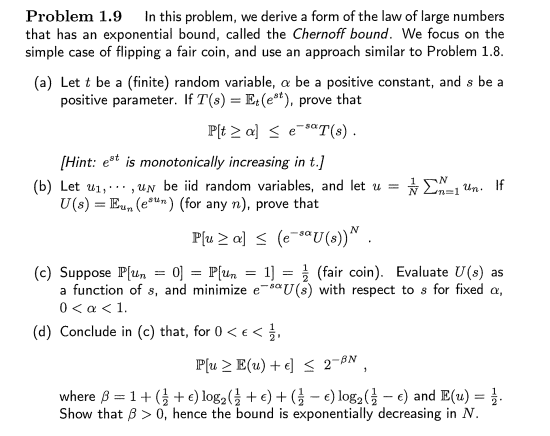

La desigualdad de Chernoff enuncia que dado un parámetro $t>0$ y una variable aleatoria $X$, por la desigualdad de Markov se tiene que:
$$P(e^{xt}\geq e^{\alpha t})\leq \frac{E(e^{xt})}{e^{\alpha t}}=e^{-\alpha t}E(e^{xt})$$
a. para le primer punto hay que tener en cuenta que la $P(X\geq x)$ es una función creciente y además que $e^x>x$ para todo x, así que si $s>0$, entonces 

$$P(st\geq s\alpha ) \leq P(e^{st}\geq e^{s \alpha })\leq e^{-s\alpha }E(e^{st})$$
quedando demostrado

b. Como son identicamente distribuidas y además independientes, además usando la desigualdad anterior:

$$P(su\geq s\alpha)= P(s\sum_{n=1}^N{u_n}\geq N s\alpha)$$
$$\leq e^{-Ns\alpha}E(e^{\sum_{n=1}^N{s u_n} })$$
$$\leq e^{-Ns\alpha}E(e^{s u_n})^N$$
$$\leq (e^{-s\alpha}E(e^{s u_n}))^N$$

c. Se debe hallar el valor esperado:
$$\begin{align*} E(e^{su_n})=\sum_{n=0}^1 e^{su_n}P(u_n)\\
=&e^{s\cdot 0}P(u_n=0)+e^{s\cdot 1}P(u_n=1)\\
=&\frac{1}{2}+\frac{1}{2}e^{s} \end{align*}$$

Ahora para minimizar $e^{-s\alpha}U(s)$ se tiene que derivar e igualar a 0

$$\begin{align*}\frac{\partial}{\partial s}(e^{-s\alpha}U(s))=&-\alpha e^{-s\alpha}U(s)+ e^{-s\alpha}U'(s)\\
=&-\alpha e^{-s\alpha}(\frac{1}{2}+\frac{1}{2}e^{s})+ e^{-s\alpha}(\frac{1}{2}e^{s})\end{align*}$$

Igualando a 0 se obtiene lo siguiente:

$$\begin{align*}-\alpha e^{-s\alpha}(\frac{1}{2}+\frac{1}{2}e^{s})+ e^{-s\alpha}(\frac{1}{2}e^{s})=&0\\
-\alpha -\alpha e^s+e^s=&0\\
e^s=&\frac{\alpha}{1-\alpha}\\
s=&\ln(\alpha)-\ln (1-\alpha)\end{align*}$$

d. Para ver que $E(u)=\frac{1}{2}$ se toma toma la derivada y se evalua en $s=0$ $U(s)_{s=0}$, entonces:

$$E(u)=\frac{\partial U(s)}{\partial s}_{s=0}=\frac{1}{2}$$

Para la segunda parte  sea $\alpha = E(u) + \epsilon = \frac{1}{2} + \epsilon$, then tenemos que $P[u \ge E(u) + \epsilon] \leq (e^{-s\alpha}U(s))^N$ del anterior problema. Como la desigualdad se cuemple para todo $s \gt 0$, también se cumple para $s = ln{\frac{\alpha}{1-\alpha}}$. Tomando este $s$ en a desigualdad tenemos qué:

$$ \begin{align*} e^{-s\alpha}U(s) &= e^{-s\alpha} \frac{1}{2}(1+e^s)\\ 
&= \frac{1}{2} e^{-\alpha ln{\frac{\alpha}{1-\alpha}}} (1+e^ {ln{\frac{\alpha}{1-\alpha}}})\\ 
&= \frac{1}{2} \left(\frac{1-\alpha}{\alpha}\right)^{\alpha} (1+\frac{\alpha}{1-\alpha})\\ 
&= \frac{1}{2} \left(\frac{1-\alpha}{\alpha}\right)^{\alpha} \frac{1}{1-\alpha}\\ 
&= \frac{1}{2} \frac{(1-\alpha)^{\alpha -1}}{\alpha^{\alpha}}\\ 
&= \frac{1}{2} \frac{(\frac{1}{2}-\epsilon)^{\epsilon -\frac{1}{2}}}{(\frac{1}{2}+\epsilon)^{\frac{1}{2}+\epsilon}}\\ 
&= \frac{1}{2}(\frac{1}{2}-\epsilon)^{-(\frac{1}{2}-\epsilon)}(\frac{1}{2}+\epsilon)^{-(\frac{1}{2}+\epsilon)}\\ 
e^{-s\alpha}U(s)&= 2^{-\beta}\\
(e^{-s\alpha}U(s))^N&= 2^{-\beta N}
 \end{align*} $$

donde $\beta = 1 + (\frac{1}{2}+\epsilon)log_2{(\frac{1}{2}+\epsilon)}+ (\frac{1}{2}-\epsilon)log_2{(\frac{1}{2}-\epsilon)}$

Esto muestra la desigualdad $P[u \ge E(u) + \epsilon] \le 2^{-\beta N}$.

Para ver que $\beta>0$ tómese $p=\frac{1}{2}+\epsilon$, así  $1-p=\frac{1}{2}-\epsilon$, por lo tanto $\frac{1}{2} < p < 1$ y

$$\beta=1+p\log_2 p + (1-p)\log_2(1-p)$$
$$2^\beta=2p^p  (1-p)^{1-p}$$

Para qu $\beta>0$ la anterios expresión debe ser mayor que 1, usando la derivada 
$$\begin{align*}
\frac{\partial}{\partial p}(2p^p  (1-p)^{1-p})&=2p^p(1-p)^{1-p}(\ln p-\ln(1-p))\\
 & \\
0 &=2p^p(1-p)^{1-p}(\ln p-\ln(1-p))\\
\frac{1}{2} &=p\end{align*}$$

Usando la segunda derivada y evaluandola en $p=1/2$ se obtiene que

$$\frac{\partial^2(2p^p  (1-p)^{1-p})}{\partial p^2}_{p=1/2}=4$$

Esto quiere decir que hay un mínimo en $p=1/2$ y si reemplazamos esto en $2p^p  (1-p)^{1-p}$ se tiene que $2^\beta=1$, por lo tanto $2^\beta > 1$ y de ahí que $\beta>0$. 



#Problema 1.12

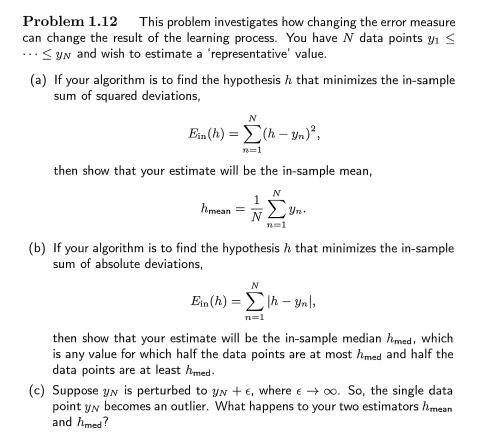

a. Para minimizar tómese la derivada respecto a h en la expresión:

$$E_{in}(h)=\sum_{n=1}^N{(h-y_n)^2}$$

$$\frac{\partial E_{in}}{\partial h}=2\sum_{n=1}^N{h-y_n}$$

para minimizar se iguala a 0

$$2\sum_{n=1}^N{h-y_n}=0$$
$$h\sum_{n=1}^N{1}=\sum_{n=1}^N{y_n}$$
$$h=\frac{1}{N}\sum_{n=1}^N{y_n}$$

b. Para minimizar tómese la derivada respecto a h en la expresión:

$$E_{in}(h)=\sum_{n=1}^N{|h-y_n|}$$

$$\frac{\partial E_{in}}{\partial h}=\sum_{n=1}^N{Sign(h-y_n)}$$

para minimizar se iguala a 0

$$2\sum_{n=1}^N{Sign(h-y_n)}=0$$
Y lo anterior se cumple si $h$ esta en la mitad de los datos dado que la cantidad de datos tales que $h>y_n$ deben ser la misma cantidad a los datos que cumplen $h < y_n$ y esto se da para $h=median(y_n)$.


c. Para el caso de la media cuando $\epsilon \rightarrow \infty$, esta se convierte en un estimador sesgado pues la media crece a medida que el valor $y_N$ crece, en cambio en el caso de la mediana, este estimador no se vera muy afectado por ello pues lo que indica la mediana es una posición, no se ve afectado por valores grandes, cambiaría si la cantidad de datos aumenta.
